In [26]:
import os
os.chdir(r'C:\Users\fzh00\Desktop\文件\excel\阿里天池\保险反欺诈')
import numpy as np
import pandas as pd
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
train['绑定日期']=pd.to_datetime(train['policy_bind_date'].astype(str))
train['绑定年份']=train['绑定日期'].dt.year
train['出险日期']=pd.to_datetime(train['incident_date'].astype(str))
train['出险年份']=train['出险日期'].dt.year
train['保龄']=train['出险年份']-train['绑定年份']
train['车龄']=train['出险年份']-train['auto_year']
train2 = train.drop(['policy_id','policy_bind_date','policy_csl','insured_zip','capital-loss','capital-gains','auto_year','umbrella_limit','绑定日期','绑定年份','出险日期','出险年份'],axis=1)
train2['insured_sex']= train2['insured_sex'].map({'FEMALE':0,'MALE':1})

from sklearn.preprocessing import LabelEncoder
for i in train2.columns:
    if train2[i].dtype =='object':
        train2[i] = LabelEncoder().fit_transform(train2[i])
from sklearn.model_selection import train_test_split
labels = train2.pop('fraud')
train2.head(2)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train2, labels,
                                                test_size=0.2,
                                                random_state=422,
                                                stratify=labels)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,Ytrain)
knn.score(Xtrain,Ytrain)

,age,customer_months,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,保龄,车龄
0,37,189,2,1000,1465.71,0,5,10,15,1,...,3,0,54930,6029,5752,44452,9,26,1,14
1,44,234,1,500,821.24,1,3,2,14,2,...,1,2,50680,5376,10156,37347,6,10,17,19


KNeighborsClassifier()

AttributeError: 'NoneType' object has no attribute 'split'

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df3.iloc[:,:-1],df3.iloc[:,-1])
knn.score(df3.iloc[:,:-1],df3.iloc[:,-1])
knn.predict(df3.iloc[:,:-1])

KNeighborsClassifier()

0.9666666666666667

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=True,oob_score=True) #袋外样本必需设置
RF.fit(df3.iloc[:,:-1],df3.iloc[:,-1])
RF.score(df3.iloc[:,:-1],df3.iloc[:,-1])

RandomForestClassifier(oob_score=True)

1.0

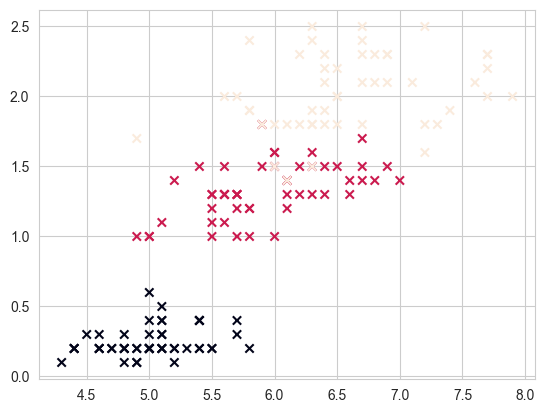

In [67]:
plt.scatter(df3.sepL,df3.petW,c=DT.predict(df3.iloc[:,:-1]),marker='x')

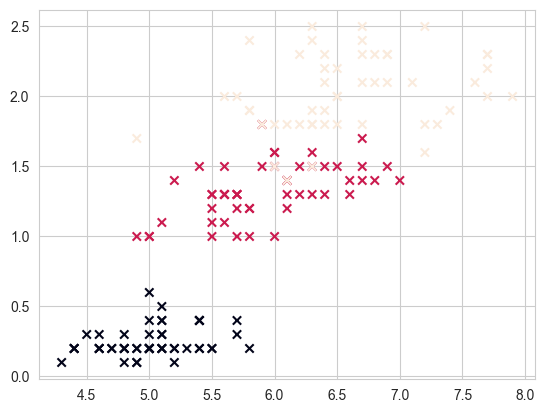

In [66]:
import matplotlib.pyplot as plt
plt.scatter(df3.sepL,df3.petW,c=df3['class'],marker='x')

In [64]:
df3

KeyError: 0

In [7]:
# 导入 决策树
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(df3.iloc[:,:-1],df3.iloc[:,-1])
DT.score(df3.iloc[:,:-1],df3.iloc[:,-1])

DecisionTreeClassifier()

1.0

In [6]:
df3.iloc[:,:-1].head()

,sepL,sepW,petL,petW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df3 = df3.rename(columns ={0:'class'})
df3.head()

,sepL,sepW,petL,petW,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df3['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [14]:
df3 = pd.concat([df,pd.DataFrame(iris.target)],axis=1)
df3.head()

,sepL,sepW,petL,petW,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=['sepL','sepW','petL','petW'])
# df2 = pd.concat([df,pd.DataFrame(iris.targe)],axis=1)
# df2.head()
df.head()

,sepL,sepW,petL,petW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"